In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

DATA_FOLDER = "../DATA/"

In [2]:
train = pd.read_parquet(DATA_FOLDER + "RAW/train.parq").dropna().drop_duplicates()
train

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0
...,...,...,...,...,...,...,...,...,...,...,...
61629671,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:bruteforce,9606,191439,0
61629673,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:scan,9606,191439,0
61629674,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:exploit,9606,191439,0
61629681,2023-08-24 21:14:46+00:00,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:scan,40383,193446,0


In [3]:
relation_attacker_attacked = train[["label", "watcher_country", "attacker_country"]]
relation_attacker_attacked = relation_attacker_attacked.groupby(['attacker_country', "watcher_country"])['label'].value_counts().unstack().fillna(0).reset_index()
relation_attacker_attacked

C:\Users\Francisco\AppData\Local\Temp\ipykernel_4416\2661781729.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relation_attacker_attacked = relation_attacker_attacked.groupby(['attacker_country', "watcher_country"])['label'].value_counts().unstack().fillna(0).reset_index()


label,attacker_country,watcher_country,0,1
0,AD,AD,0,0
1,AD,AE,0,0
2,AD,AL,0,0
3,AD,AM,0,0
4,AD,AO,0,0
...,...,...,...,...
27815,ZW,UZ,5,0
27816,ZW,VE,0,0
27817,ZW,VI,0,0
27818,ZW,VN,8,0


In [4]:
relation_attacker_attacked.rename(columns={1:"1", 0:"0"}, inplace=True)
relation_attacker_attacked

label,attacker_country,watcher_country,0,1
0,AD,AD,0,0
1,AD,AE,0,0
2,AD,AL,0,0
3,AD,AM,0,0
4,AD,AO,0,0
...,...,...,...,...
27815,ZW,UZ,5,0
27816,ZW,VE,0,0
27817,ZW,VI,0,0
27818,ZW,VN,8,0


In [5]:
relation_attacker_attacked_only_vpn = relation_attacker_attacked[relation_attacker_attacked["1"] != 0]
relation_attacker_attacked_only_vpn["total"] = relation_attacker_attacked_only_vpn["0"]+relation_attacker_attacked_only_vpn["1"]
relation_attacker_attacked_only_vpn["percentage"] = relation_attacker_attacked_only_vpn["1"]/relation_attacker_attacked_only_vpn["total"]*100
relation_attacker_attacked_only_vpn[relation_attacker_attacked_only_vpn["percentage"] == 100]

C:\Users\Francisco\AppData\Local\Temp\ipykernel_4416\3800986013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relation_attacker_attacked_only_vpn["total"] = relation_attacker_attacked_only_vpn["0"]+relation_attacker_attacked_only_vpn["1"]
C:\Users\Francisco\AppData\Local\Temp\ipykernel_4416\3800986013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relation_attacker_attacked_only_vpn["percentage"] = relation_attacker_attacked_only_vpn["1"]/relation_attacker_attacked_only_vpn["total"]*100


label,attacker_country,watcher_country,0,1,total,percentage
226,AE,PH,0,4,4,100.0
1328,AU,CR,0,1,1,100.0
1350,AU,GT,0,4,4,100.0
1378,AU,MN,0,1,1,100.0
1382,AU,MU,0,2,2,100.0
...,...,...,...,...,...,...
27161,WS,UA,0,11,11,100.0
27163,WS,US,0,511,511,100.0
27169,WS,ZA,0,2,2,100.0
27476,ZA,GH,0,2,2,100.0


In [6]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
relation_attacker_attacked_only_vpn['percentage_bin'] = pd.cut(relation_attacker_attacked_only_vpn['percentage'], bins=bins, right=True)
relation_attacker_attacked_only_vpn

C:\Users\Francisco\AppData\Local\Temp\ipykernel_4416\3603401139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relation_attacker_attacked_only_vpn['percentage_bin'] = pd.cut(relation_attacker_attacked_only_vpn['percentage'], bins=bins, right=True)


label,attacker_country,watcher_country,0,1,total,percentage,percentage_bin
136,AE,AT,214,2,216,0.925926,"(0, 5]"
137,AE,AU,2214,30,2244,1.336898,"(0, 5]"
141,AE,BD,9,2,11,18.181818,"(15, 20]"
142,AE,BE,556,8,564,1.418440,"(0, 5]"
143,AE,BG,90,2,92,2.173913,"(0, 5]"
...,...,...,...,...,...,...,...
27551,ZA,UA,108,13,121,10.743802,"(10, 15]"
27552,ZA,UG,7,2,9,22.222222,"(20, 25]"
27553,ZA,US,35399,3561,38960,9.140144,"(5, 10]"
27558,ZA,VN,203,10,213,4.694836,"(0, 5]"


In [7]:
grouped = relation_attacker_attacked_only_vpn.groupby('percentage_bin').agg({'total': 'sum','percentage_bin': lambda x: x.value_counts().iloc[0]})
grouped = grouped.rename(columns={"percentage_bin": "amount_conecctions"}).reset_index()
grouped

C:\Users\Francisco\AppData\Local\Temp\ipykernel_4416\1642007763.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = relation_attacker_attacked_only_vpn.groupby('percentage_bin').agg({'total': 'sum','percentage_bin': lambda x: x.value_counts().iloc[0]})


label,percentage_bin,total,amount_conecctions
0,"(0, 5]",35283421,1737
1,"(5, 10]",1616948,291
2,"(10, 15]",1071699,109
3,"(15, 20]",19281,61
4,"(20, 25]",14961,45
5,"(25, 30]",24215,22
6,"(30, 35]",5151,17
7,"(35, 40]",9499,23
8,"(40, 45]",1188,6
9,"(45, 50]",1454,23


In [8]:
grouped['percentage_bin'].unique()

[(0, 5], (5, 10], (10, 15], (15, 20], (20, 25], ..., (75, 80], (80, 85], (85, 90], (90, 95], (95, 100]]
Length: 20
Categories (20, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (80, 85] < (85, 90] < (90, 95] < (95, 100]]

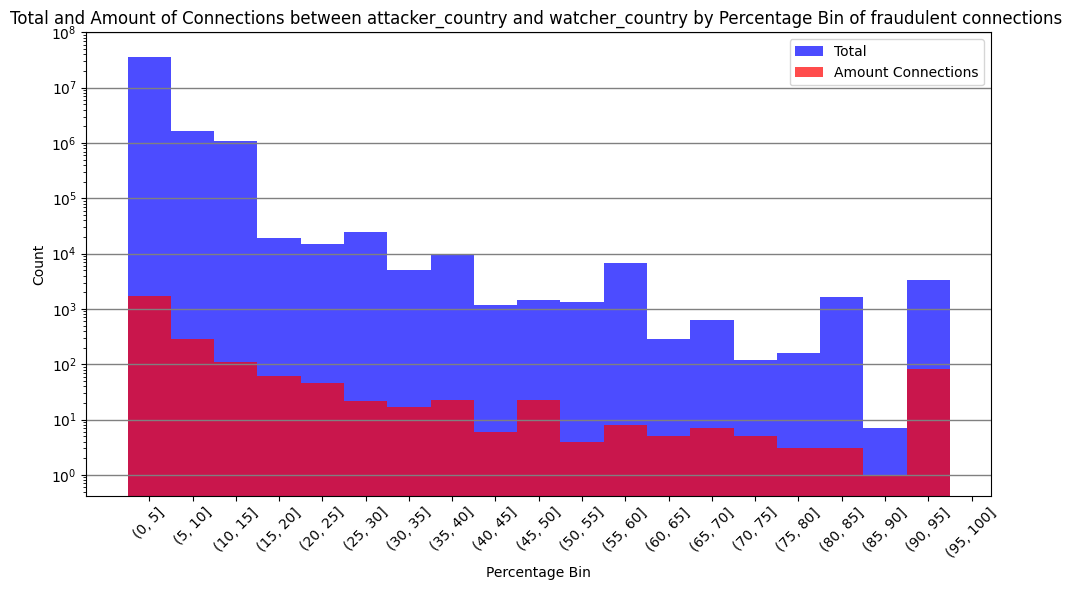

In [9]:
grouped['percentage_bin'] = grouped['percentage_bin'].astype(str)
# Define the numerical bins based on categorical labels
bins = ['(0, 5]', '(5, 10]', '(10, 15]', '(15, 20]', '(20, 25]',
       '(25, 30]', '(30, 35]', '(35, 40]', '(40, 45]', '(45, 50]',
       '(50, 55]', '(55, 60]', '(60, 65]', '(65, 70]', '(70, 75]',
       '(75, 80]', '(80, 85]', '(85, 90]', '(90, 95]', '(95, 100]']

# Creating the line plot with numerical bins
plt.figure(figsize=(10, 6))
plt.hist(grouped['percentage_bin'], bins=bins, weights=grouped['total'], label='Total', alpha=0.7, align='left', color = 'blue')
plt.hist(grouped['percentage_bin'], bins=bins, weights=grouped['amount_conecctions'], label='Amount Connections', alpha=0.7, align='left', color = 'red')

# Adding labels and title
plt.xlabel('Percentage Bin')
plt.ylabel('Count')
plt.title('Total and Amount of Connections between attacker_country and watcher_country by Percentage Bin of fraudulent connections ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()  # Show legend
plt.yscale('log')
plt.yticks([10**i for i in range(9)])
# Display the plot
plt.gca().yaxis.grid(True, linestyle='-', linewidth=1, color="grey")
plt.tight_layout()
plt.show()

